# Analysis

This notebook is NEW CONTINUING: I am piping in data objects created from other notebooks and analyzing them.

I will be combining datasets here and analyzing them based on my research questions.

## Loading in the data

In [1]:
# loading packages
import numpy as np
import pandas as pd
import nltk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# load in the pickled data frames

f1 = open('characters_update_df.pkl', 'rb')
characters_df = pickle.load(f1)
f1.close()

f2 = open('conversations_df.pkl', 'rb')
conversations_df = pickle.load(f2)
f2.close()

f3 = open('movies_df.pkl', 'rb')
movies_df = pickle.load(f3)
f3.close

f4 = open('utterances_df.pkl', 'rb')
utterances_df = pickle.load(f4)
f4.close

<function BufferedReader.close>

Let's make sure they all look okay.

In [3]:
characters_df.head()

,character_ID,character_name,movie_ID,movie_title,gender
0,u0,BIANCA,m0,10 things i hate about you,F
2,u2,CAMERON,m0,10 things i hate about you,M
4,u4,JOEY,m0,10 things i hate about you,M
5,u5,KAT,m0,10 things i hate about you,F
6,u6,MANDELLA,m0,10 things i hate about you,F


In [4]:
conversations_df.head()

,character1_ID,character2_ID,movie_ID,dialogue
0,u0,u2,m0,"['L194', 'L195', 'L196', 'L197']"
1,u0,u2,m0,"['L198', 'L199']"
2,u0,u2,m0,"['L200', 'L201', 'L202', 'L203']"
3,u0,u2,m0,"['L204', 'L205', 'L206']"
4,u0,u2,m0,"['L207', 'L208']"


In [5]:
movies_df.head()

,movie_title,movie_year,genres,movie_decade
0,10 things i hate about you,1999,"['comedy', 'romance']",1990
1,1492: conquest of paradise,1992,"['adventure', 'biography', 'drama', 'history']",1990
2,15 minutes,2001,"['action', 'crime', 'drama', 'thriller']",2000
3,2001: a space odyssey,1968,"['adventure', 'mystery', 'sci-fi']",1960
4,48 hrs.,1982,"['action', 'comedy', 'crime', 'drama', 'thrill...",1980


In [6]:
utterances_df.head()

,line_ID,character_ID,movie_ID,character_name,utterance,sents,tokens,pos_tag,sent_count,token_count,avg_sent_length
0,L1045,u0,m0,BIANCA,They do not!,[They do not!],"[They, do, not, !]","[(They, PRP), (do, VBP), (not, RB), (!, .)]",1,4,4.0
1,L1044,u2,m0,CAMERON,They do to!,[They do to!],"[They, do, to, !]","[(They, PRP), (do, VBP), (to, TO), (!, .)]",1,4,4.0
2,L985,u0,m0,BIANCA,I hope so.,[I hope so.],"[I, hope, so, .]","[(I, PRP), (hope, VBP), (so, RB), (., .)]",1,4,4.0
3,L984,u2,m0,CAMERON,She okay?,[She okay?],"[She, okay, ?]","[(She, PRP), (okay, PRP), (?, .)]",1,3,3.0
4,L925,u0,m0,BIANCA,Let's go.,[Let's go.],"[Let, 's, go, .]","[(Let, VB), ('s, POS), (go, VB), (., .)]",1,4,4.0


They all look good I will review some basic information about the data and then compile the data.

## Data Overview

Let's review some basic information about the corpus before diving in.

In [7]:
# how many movies in the corpus?
movies_df.movie_title.count()

617

In [8]:
# what's the earliest year represented?
movies_df.movie_year.min()

1927

In [9]:
# what's the latest year represented?
movies_df.movie_year.max()

2010

In [10]:
# how many characters are in the corpus?
characters_df.character_name.count()

9033

In [11]:
# how many utterances?
utterances_df.line_ID.count()

304713

In [12]:
# how many tokens?
utterances_df.token_count.sum()

4181442

## Compiling the Data

### Linguistic Analysis

In [13]:
# because I am looking at discourse, I will use the utterances data frame and load other data into it

# adding gender
discourse_df = pd.merge(utterances_df, characters_df)

# adding movie year and decade
discourse_df = pd.merge(discourse_df, movies_df)

In [14]:
# there are 267 utterances that are empty, I will remove them
discourse_df = discourse_df[discourse_df.token_count != 0]

In [15]:
discourse_df.head()

,line_ID,character_ID,movie_ID,character_name,utterance,sents,tokens,pos_tag,sent_count,token_count,avg_sent_length,movie_title,gender,movie_year,genres,movie_decade
0,L1045,u0,m0,BIANCA,They do not!,[They do not!],"[They, do, not, !]","[(They, PRP), (do, VBP), (not, RB), (!, .)]",1,4,4.000000,10 things i hate about you,F,1999,"['comedy', 'romance']",1990
1,L985,u0,m0,BIANCA,I hope so.,[I hope so.],"[I, hope, so, .]","[(I, PRP), (hope, VBP), (so, RB), (., .)]",1,4,4.000000,10 things i hate about you,F,1999,"['comedy', 'romance']",1990
2,L925,u0,m0,BIANCA,Let's go.,[Let's go.],"[Let, 's, go, .]","[(Let, VB), ('s, POS), (go, VB), (., .)]",1,4,4.000000,10 things i hate about you,F,1999,"['comedy', 'romance']",1990
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,[Okay -- you're gonna need to learn how to lie.],"[Okay, --, you, 're, gon, na, need, to, learn,...","[(Okay, NNP), (--, :), (you, PRP), ('re, VBP),...",1,13,13.000000,10 things i hate about you,F,1999,"['comedy', 'romance']",1990
4,L870,u0,m0,BIANCA,I'm kidding. You know how sometimes you just ...,"[I'm kidding., You know how sometimes you just...","[I, 'm, kidding, ., You, know, how, sometimes,...","[(I, PRP), ('m, VBP), (kidding, VBG), (., .), ...",3,25,8.333333,10 things i hate about you,F,1999,"['comedy', 'romance']",1990


In [17]:
discourse_df.describe()

,sent_count,token_count,avg_sent_length,movie_year,movie_decade
count,304403.000000,304403.000000,304403.000000,304403.000000,304403.000000
mean,1.695433,13.736120,7.856031,1988.106428,1983.434822
std,1.252371,14.712649,5.155597,17.141863,17.204418
min,1.000000,1.000000,1.000000,1927.000000,1920.000000
25%,1.000000,5.000000,4.500000,1984.000000,1980.000000
50%,1.000000,9.000000,7.000000,1995.000000,1990.000000
75%,2.000000,17.000000,10.000000,1999.000000,1990.000000
max,45.000000,684.000000,122.000000,2010.000000,2010.000000


Per turn there is a wide range on the token counts, from 1 to 684. There is also a wide range per turn on sentence counts, from 1 to 45. I need to decide if I will include the max values in my analysis to follow. For now they will remain in.

#### Tokens

I am looking at token counts to see if there is a difference between turns by gender.

In [18]:
discourse_df.groupby('gender').token_count.mean()

gender
A          13.211688
F          13.115384
M          13.909054
unknown    14.701443
Name: token_count, dtype: float64

Only 0.79 difference between average token counts of male and female characters. Characters with unknown gender markers have the longest turns at 14.7. Female characters have the shortest tokens per turn. Female and ambiguous characters fall below the mean and male and unknown are above the mean.

In [19]:
# raw counts of tokens across the corpus
discourse_df.groupby('gender').token_count.sum()

gender
A           120266
F          1085298
M          2616140
unknown     359612
Name: token_count, dtype: int64

Raw count doesn't help for comparison across categories, but by looking at this we can see that there are more male characters because the average token count above does not differ as much as the raw counts.

In [71]:
# what is the shortest turn by token count?
discourse_df.groupby('gender').token_count.min()

gender
A          1
F          1
M          1
unknown    1
Name: token_count, dtype: int64

Characters across all gender markers have utterances that are only one token long. I expect these will be interjections of some kind.

In [20]:
discourse_df[discourse_df.token_count==1]

,line_ID,character_ID,movie_ID,character_name,utterance,sents,tokens,pos_tag,sent_count,token_count,avg_sent_length,movie_title,gender,movie_year,genres,movie_decade
10,L698,u0,m0,BIANCA,But,[But],[But],"[(But, CC)]",1,1,1.0,10 things i hate about you,F,1999,"['comedy', 'romance']",1990
13,L663,u0,m0,BIANCA,Tons,[Tons],[Tons],"[(Tons, NNS)]",1,1,1.0,10 things i hate about you,F,1999,"['comedy', 'romance']",1990
61,L904,u0,m0,BIANCA,But,[But],[But],"[(But, CC)]",1,1,1.0,10 things i hate about you,F,1999,"['comedy', 'romance']",1990
100,L924,u2,m0,CAMERON,Wow,[Wow],[Wow],"[(Wow, NN)]",1,1,1.0,10 things i hate about you,M,1999,"['comedy', 'romance']",1990
101,L871,u2,m0,CAMERON,No,[No],[No],"[(No, DT)]",1,1,1.0,10 things i hate about you,M,1999,"['comedy', 'romance']",1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298494,L646110,u8846,m600,CHINA,Yeah,[Yeah],[Yeah],"[(Yeah, NN)]",1,1,1.0,waxwork,unknown,1988,"['comedy', 'fantasy', 'horror']",1980
298555,L646365,u8851,m600,MARK,China,[China],[China],"[(China, NNP)]",1,1,1.0,waxwork,M,1988,"['comedy', 'fantasy', 'horror']",1980
298588,L646309,u8853,m600,MR LINCOLN,Hi,[Hi],[Hi],"[(Hi, NN)]",1,1,1.0,waxwork,M,1988,"['comedy', 'fantasy', 'horror']",1980
302247,L659811,u8950,m610,DOROTHY,Oh-oh-,[Oh-oh-],[Oh-oh-],"[(Oh-oh-, NN)]",1,1,1.0,the wizard of oz,F,1939,"['adventure', 'family', 'fantasy', 'musical']",1930


At quick glance, some answers and greetings.

In [21]:
# what's the longest turn by token count?
discourse_df.groupby('gender').token_count.max()

gender
A          225
F          368
M          684
unknown    337
Name: token_count, dtype: int64

In [22]:
# this is the longest token count per utterance
discourse_df[discourse_df.token_count==684]
# seems like it may be a narration intro...it may be removed from analysis

,line_ID,character_ID,movie_ID,character_name,utterance,sents,tokens,pos_tag,sent_count,token_count,avg_sent_length,movie_title,gender,movie_year,genres,movie_decade
182732,L217873,u5313,m352,PARRY,Then let's begin with the story itself. It's a...,"[Then let's begin with the story itself., It's...","[Then, let, 's, begin, with, the, story, itsel...","[(Then, RB), (let, NN), ('s, POS), (begin, VB)...",26,684,26.307692,the fisher king,M,1991,"['comedy', 'drama', 'romance']",1990


At the total corpus level there are some small differences between gender at the token level. I will factor in movie decade to see if any differences can be detected across time.

#### Token and Movie Decade

In [23]:
discourse_df.groupby(['movie_decade','gender']).token_count.mean()

movie_decade  gender 
1920          A          10.882353
              F           6.137931
              M          10.054054
              unknown     8.714286
1930          A          10.429487
              F          13.953283
              M          15.468050
              unknown    15.525862
1940          A          15.484076
              F          15.083987
              M          15.317989
              unknown    14.523220
1950          A          13.398305
              F          14.269518
              M          13.995191
              unknown    13.518856
1960          A          16.606557
              F          12.064139
              M          14.054879
              unknown    14.871824
1970          A          12.406340
              F          12.909269
              M          13.892245
              unknown    15.359916
1980          A          12.722094
              F          12.216716
              M          13.121848
              unknown    14.18500

In [76]:
discourse_df.groupby(['movie_decade','gender']).token_count.min()
# looks like not all movies have as short of utterances

movie_decade  gender 
1920          A           2
              F           2
              M           2
              unknown     2
1930          A           2
              F           1
              M           1
              unknown     1
1940          A           2
              F           1
              M           1
              unknown     1
1950          A           2
              F           1
              M           2
              unknown     2
1960          A           2
              F           1
              M           2
              unknown     1
1970          A           1
              F           1
              M           1
              unknown     1
1980          A           1
              F           1
              M           1
              unknown     1
1990          A           2
              F           1
              M           1
              unknown     1
2000          A           2
              F           1
              M           

In [77]:
discourse_df.groupby(['movie_decade','gender']).token_count.max()

movie_decade  gender 
1920          A           33
              F           20
              M          165
              unknown     39
1930          A           91
              F          160
              M          227
              unknown    337
1940          A          146
              F          229
              M          358
              unknown    118
1950          A           77
              F          317
              M          247
              unknown    120
1960          A          126
              F          238
              M          366
              unknown    118
1970          A           93
              F          239
              M          253
              unknown    208
1980          A          197
              F          368
              M          266
              unknown    173
1990          A          159
              F          243
              M          684
              unknown    243
2000          A          225
              F      

#### Sentences

In [24]:
# how many sentences per turn?
discourse_df.groupby('gender').sent_count.mean()

gender
A          1.655608
F          1.654707
M          1.708723
unknown    1.745840
Name: sent_count, dtype: float64

The average utterance is less than two sentences long. There is not much difference across the categories. On average, male utterances have slightly more sentences. Again, unknown gender has the most (but barely) average sentences per utterance.

In [25]:
discourse_df.groupby('gender').sent_count.sum()
# more sentences for male characters

gender
A           15071
F          136927
M          321392
unknown     42705
Name: sent_count, dtype: int64

This is another view of what we saw above: there are more male characters, which is why the raw sentence count is higher but not the average sentence count.

In [26]:
# how many tokens per sentence?
discourse_df.groupby('gender').avg_sent_length.mean()
# average sentence length across all genders does not seem to be too wide of a spread

gender
A          7.847309
F          7.676477
M          7.881825
unknown    8.268361
Name: avg_sent_length, dtype: float64

For each gender, sentences have on average around 8 words, although female characters have the shortest averages sentences at 7.67.

In [27]:
discourse_df.groupby('gender').sent_count.max()
# the longest turn by number of sentences

gender
A          18
F          33
M          45
unknown    24
Name: sent_count, dtype: int64

Commentary

In [95]:
discourse_df[(discourse_df.sent_count==18) & (discourse_df.gender=='A')]

,line_ID,character_ID,movie_ID,character_name,utterance,sents,tokens,pos_tag,sent_count,token_count,...,movie_title,gender,split_name,movie_year,genres,movie_decade,rb_count,jj_count,cc_count,uh_count
218933,L368952,u6482,m431,DR. CHILTON,It's written on toilet tissue. 'My dear Dr. L...,"[It's written on toilet tissue., 'My dear Dr. ...","[It, 's, written, on, toilet, tissue, ., 'My, ...","[(It, PRP), ('s, VBZ), (written, VBN), (on, IN...",18,197,...,manhunter,A,NaN,1986,"['crime', 'thriller']",1980,7,9,9,0


In [94]:
discourse_df[(discourse_df.sent_count==33) & (discourse_df.gender=='F')]

,line_ID,character_ID,movie_ID,character_name,utterance,sents,tokens,pos_tag,sent_count,token_count,...,movie_title,gender,split_name,movie_year,genres,movie_decade,rb_count,jj_count,cc_count,uh_count
185791,L226026,u5406,m359,CHRIS,"When you dropped me off at the house, it was v...","[When you dropped me off at the house, it was ...","[When, you, dropped, me, off, at, the, house, ...","[(When, WRB), (you, PRP), (dropped, VBD), (me,...",33,368,...,friday the 13th part iii,F,NaN,1982,['horror'],1980,31,17,17,3


In [97]:
discourse_df[discourse_df.sent_count==45]

,line_ID,character_ID,movie_ID,character_name,utterance,sents,tokens,pos_tag,sent_count,token_count,...,movie_title,gender,split_name,movie_year,genres,movie_decade,rb_count,jj_count,cc_count,uh_count
204982,L311961,u6045,m402,GEORGE,"Just a minute  just a minute. Now, hold on, ...","[Just a minute  just a minute., Now, hold on...","[Just, a, minute, , just, a, minute, ., Now,...","[(Just, RB), (a, DT), (minute, JJ), (, NN), ...",45,358,...,it's a wonderful life,M,NaN,1946,"['drama', 'fantasy', 'romance']",1940,32,23,23,1


In [96]:
discourse_df[(discourse_df.sent_count==24) & (discourse_df.gender=='unknown')]

,line_ID,character_ID,movie_ID,character_name,utterance,sents,tokens,pos_tag,sent_count,token_count,...,movie_title,gender,split_name,movie_year,genres,movie_decade,rb_count,jj_count,cc_count,uh_count
260023,L519214,u7706,m521,CHURCH,Whatever the latest jargon is. ...,"[Whatever the latest jargon is., MEKUM Much be...","[Whatever, the, latest, jargon, is, ., MEKUM, ...","[(Whatever, WDT), (the, DT), (latest, JJS), (j...",24,176,...,soldier,unknown,[CHURCH],1998,"['action', 'drama', 'sci-fi']",1990,10,19,19,1


The longest utterance by sentence and longest utterance by token count are from male characters.

#### Sentences and Movie Decade

How does the sentence level information change by decade?

In [28]:
discourse_df.groupby(['movie_decade','gender']).sent_count.mean()

movie_decade  gender 
1920          A          1.352941
              F          1.155172
              M          1.432432
              unknown    1.396825
1930          A          1.653846
              F          1.699495
              M          1.763523
              unknown    1.822414
1940          A          1.828025
              F          1.720958
              M          1.772380
              unknown    1.732198
1950          A          1.559322
              F          1.651052
              M          1.626274
              unknown    1.657997
1960          A          1.680328
              F          1.509076
              M          1.618694
              unknown    1.635104
1970          A          1.621518
              F          1.587618
              M          1.637351
              unknown    1.670981
1980          A          1.622787
              F          1.627443
              M          1.684883
              unknown    1.756087
1990          A          1

COMMENTARY

In [84]:
discourse_df.groupby(['movie_decade','gender']).sent_count.min()

movie_decade  gender 
1920          A          1
              F          1
              M          1
              unknown    1
1930          A          1
              F          1
              M          1
              unknown    1
1940          A          1
              F          1
              M          1
              unknown    1
1950          A          1
              F          1
              M          1
              unknown    1
1960          A          1
              F          1
              M          1
              unknown    1
1970          A          1
              F          1
              M          1
              unknown    1
1980          A          1
              F          1
              M          1
              unknown    1
1990          A          1
              F          1
              M          1
              unknown    1
2000          A          1
              F          1
              M          1
              unknown    1
2010  

COMMENTARY

In [85]:
discourse_df.groupby(['movie_decade','gender']).sent_count.max()

movie_decade  gender 
1920          A           3
              F           2
              M          14
              unknown     4
1930          A           9
              F          14
              M          20
              unknown    18
1940          A          10
              F          19
              M          45
              unknown    10
1950          A           6
              F          26
              M          16
              unknown    12
1960          A           9
              F          18
              M          25
              unknown    17
1970          A          13
              F          18
              M          23
              unknown    14
1980          A          18
              F          33
              M          22
              unknown    17
1990          A          15
              F          20
              M          39
              unknown    24
2000          A          15
              F          21
              M          3

COMMENTARY

In [29]:
discourse_df.groupby(['movie_decade', 'gender']).avg_sent_length.mean()

movie_decade  gender 
1920          A           7.784314
              F           5.431034
              M           6.384411
              unknown     5.801587
1930          A           6.148408
              F           7.913022
              M           8.598090
              unknown     8.220951
1940          A           8.414301
              F           8.444131
              M           8.631595
              unknown     8.257201
1950          A           8.614689
              F           8.381829
              M           8.487173
              unknown     8.167845
1960          A           9.817116
              F           7.630925
              M           8.567295
              unknown     8.847833
1970          A           7.511505
              F           7.775633
              M           8.133680
              unknown     8.957840
1980          A           7.767378
              F           7.321926
              M           7.551669
              unknown     8.00988

COMMENTARY

#### POS

I will ignore noun and verbs, as they are the most basic elements of phrase structure. I will look at adjectives and adverbs to see how often the speaker modifies their words, interjections to check for interruptions, and conjunctions to get an idea about sentence complexity.

The parts of speech I will look at are the following:
* ADV (adverb)
* ADJ (adjective)
* CCONJ (coordinating conjunction)
* INTJ (interjection)

In [86]:
# adverbs
def get_adv(x):
    pattern = r'ADV'
    advs = re.findall(pattern, ' '.join(str(z) for (y,z) in x))
    return advs

# adding data to the data frames
discourse_df['adv_count'] = discourse_df.pos_tag.apply(get_adv).str.len()

In [87]:
# adjectives
def get_adj(x):
    pattern = r'ADJ'
    adjs = re.findall(pattern, ' '.join(str(z) for (y,z) in x))
    return adjs

# adding data to the data frames
discourse_df['adj_count'] = discourse_df.pos_tag.apply(get_adj).str.len()

In [126]:
# coordinating conjunctions
def get_cconj(x):
    pattern = r'CCONJ'
    cconjs = re.findall(pattern, ' '.join(str(z) for (y,z) in x))
    return cconjs

# adding data to the data frames
discourse_df['cconj_count'] = discourse_df.pos_tag.apply(get_cconj).str.len()

In [89]:
# interjections
def get_intj(x):
    pattern = r'INTJ'
    intjs = re.findall(pattern, ' '.join(str(z) for (y,z) in x))
    return intjs

# adding data to the data frames
discourse_df['intj_count'] = discourse_df.pos_tag.apply(get_intj).str.len()

In [127]:
discourse_df.head()

,line_ID,character_ID,movie_ID,character_name,utterance,sents,tokens,pos_tag,sent_count,token_count,...,rb_count,jj_count,cc_count,uh_count,guess_count,think_count,maybe_count,might_count,perhaps_count,possibly_count
0,L1045,u0,m0,BIANCA,They do not!,[They do not!],"[They, do, not, !]","[(They, PRP), (do, VBP), (not, RB), (!, .)]",1,4,...,1,0,0,0,0,0,0,0,0,0
1,L985,u0,m0,BIANCA,I hope so.,[I hope so.],"[I, hope, so, .]","[(I, PRP), (hope, VBP), (so, RB), (., .)]",1,4,...,1,0,0,0,0,0,0,0,0,0
2,L925,u0,m0,BIANCA,Let's go.,[Let's go.],"[Let, 's, go, .]","[(Let, VB), ('s, POS), (go, VB), (., .)]",1,4,...,0,0,0,0,0,0,0,0,0,0
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,[Okay -- you're gonna need to learn how to lie.],"[Okay, --, you, 're, gon, na, need, to, learn,...","[(Okay, NNP), (--, :), (you, PRP), ('re, VBP),...",1,13,...,1,0,0,0,0,0,0,0,0,0
4,L870,u0,m0,BIANCA,I'm kidding. You know how sometimes you just ...,"[I'm kidding., You know how sometimes you just...","[I, 'm, kidding, ., You, know, how, sometimes,...","[(I, PRP), ('m, VBP), (kidding, VBG), (., .), ...",3,25,...,5,0,1,0,0,0,0,0,0,0


Let's see how each gender uses these different parts of speech. Because the POS I am analyzing are not required, the usages may be low and a min of 0 per turn can be expected. This is indicated by flashing the head of the data frame above.

In [131]:
print('There are ',discourse_df.rb_count.sum(),' adverbs in the corpus.')
print('There are ',discourse_df.jj_count.sum(),' adjectives in the corpus.')
print('There are ',discourse_df.cc_count.sum(),' conjunctions in the corpus.')
print('There are ',discourse_df.uh_count.sum(),' interjections in the corpus.')

There are  288428  adverbs in the corpus.
There are  176760  adjectives in the corpus.
There are  71145  conjunctions in the corpus.
There are  22542  interjections in the corpus.


Adverbs are by far the most common POS out of the four selected for analysis.

In [123]:
discourse_df.groupby('gender').agg({'rb_count': ['mean', 'min', 'max', 'std']})

rb_count                  
             mean min max       std
gender                             
A        0.867846   0  26  1.308073
F        0.973402   0  31  1.383198
M        0.944005   0  35  1.369266
unknown  0.916643   0  29  1.332882

Female characters have the highest mean of adverb usage at 0.97. So on avarage, almost every turn a female character will use an adverb in this corpus. However, the highest number of adverbs in one turn is from a male character with 35.

As the boxplot shows the tails across all genders are very long. The turns with 0 instances are bringing down the average.

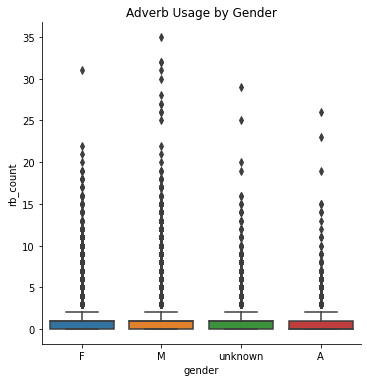

In [133]:
sns.catplot(data=discourse_df, x='gender', y='rb_count', kind='box')
plt.title('Adverb Usage by Gender')
plt.show()

In [122]:
discourse_df.groupby('gender').agg({'jj_count': ['mean', 'min', 'max', 'std']})

jj_count                  
             mean min max       std
gender                             
A        0.566077   0  12  1.000110
F        0.551553   0  23  1.016508
M        0.583463   0  53  1.081624
unknown  0.663219   0  22  1.165349

Characters with unknown gender have the highest mean usage of adjectives at .66, they also have the largest standard deviation, so there is most variability in these character's usage. Again, the most adjectives in a turn is from a male character with 53.

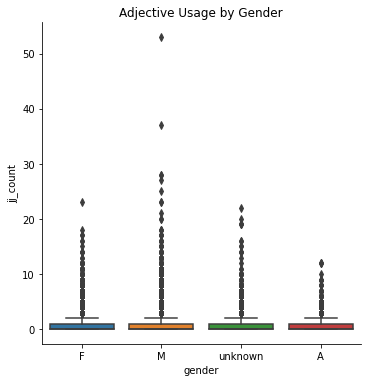

In [134]:
sns.catplot(data=discourse_df, x='gender', y='jj_count', kind='box')
plt.title('Adjective Usage by Gender')
plt.show()

In [128]:
discourse_df.groupby('gender').agg({'cc_count': ['mean', 'min', 'max', 'std']})

cc_count                  
             mean min max       std
gender                             
A        0.223003   0  11  0.607333
F        0.230912   0  21  0.642353
M        0.233639   0  34  0.643995
unknown  0.247823   0  14  0.629205

'Unknown' characters have the most conjunctions, but only by 0.01. Overall usage seems to be very consistent across the board. Once again, male characters have the highest number of conjunctions for one turn.

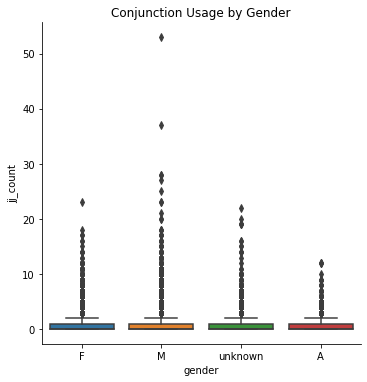

In [136]:
sns.catplot(data=discourse_df, x='gender', y='jj_count', kind='box')
plt.title('Conjunction Usage by Gender')
plt.show()

In [125]:
discourse_df.groupby('gender').agg({'uh_count': ['mean', 'min', 'max', 'std']})

uh_count                  
             mean min max       std
gender                             
A        0.067670   0   3  0.271780
F        0.083215   0   7  0.308453
M        0.071977   0   7  0.284684
unknown  0.061404   0   6  0.266850

Very low usage across the board, with female being the higest at 0.08. Both male and female characters have 7 interjections as a maximum per turn.

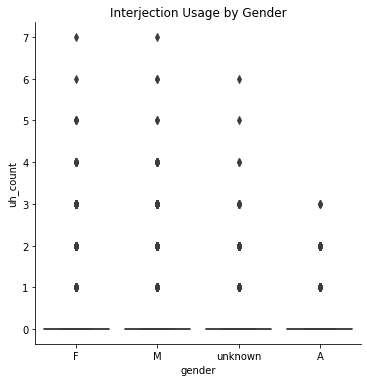

In [135]:
sns.catplot(data=discourse_df, x='gender', y='uh_count', kind='box')
plt.title('Interjection Usage by Gender')
plt.show()

#### Lexical Items

I will look to see if these hedging words appear more in one specific gender's speech or not:
* I guess
* I think
* Maybe
* Might
* Perhaps
* Possibly

In [113]:
# i guess
def get_guess(x):
    pattern = r'\\bI guess\\b'
    guesses = re.findall(pattern, ' '.join(str(y) for y in x))
    return guesses

# adding data to the data frames
discourse_df['guess_count'] = discourse_df.tokens.apply(get_guess).str.len()

In [103]:
# i think
def get_think(x):
    pattern = r'\\bI think\\b'
    thinks = re.findall(pattern, ' '.join(str(y) for y in x))
    return thinks

# adding data to the data frames
discourse_df['think_count'] = discourse_df.tokens.apply(get_think).str.len()

In [115]:
# maybe
def get_maybe(x):
    pattern = r'\\b[mM]aybe\\b'
    maybes = re.findall(pattern, ' '.join(str(y) for y in x))
    return maybes

# adding data to the data frames
discourse_df['maybe_count'] = discourse_df.tokens.apply(get_maybe).str.len()

In [105]:
# might
def get_might(x):
    pattern = r'\\b[mM]ight\\b'
    mights = re.findall(pattern, ' '.join(str(y) for y in x))
    return mights

# adding data to the data frames
discourse_df['might_count'] = discourse_df.tokens.apply(get_might).str.len()

In [106]:
# perhaps
def get_perhaps(x):
    pattern = r'\\b[pP]erhaps\\b'
    perhapses = re.findall(pattern, ' '.join(str(y) for y in x))
    return perhapses

# adding data to the data frames
discourse_df['perhaps_count'] = discourse_df.tokens.apply(get_perhaps).str.len()

In [107]:
# possibly
def get_possibly(x):
    pattern = r'\\b[pP]ossibly\\b'
    possiblys = re.findall(pattern, ' '.join(str(y) for y in x))
    return possiblys

# adding data to the data frames
discourse_df['possibly_count'] = discourse_df.tokens.apply(get_possibly).str.len()

In [116]:
discourse_df.maybe_count.sum()

0

### Gender/Movie Analysis

In [28]:
# it may be interesting to see character/gender information by year/decade

gender_df = pd.merge(characters_df, movies_df)

In [29]:
gender_df.head()

,character_ID,character_name,movie_ID,movie_title,gender,credit_position,movie_year,genres,movie_decade
0,u1,BRUCE,m0,10 things i hate about you,M,?,1999,"['comedy', 'romance']",1990
1,u3,CHASTITY,m0,10 things i hate about you,F,?,1999,"['comedy', 'romance']",1990
2,u8,MISS PERKY,m0,10 things i hate about you,F,?,1999,"['comedy', 'romance']",1990
3,u10,SHARON,m0,10 things i hate about you,F,?,1999,"['comedy', 'romance']",1990
4,u0,BIANCA,m0,10 things i hate about you,F,4,1999,"['comedy', 'romance']",1990


In [30]:
gender_df.groupby(['movie_decade', 'gender']).count()

character_ID  character_name  movie_ID  movie_title  \
movie_decade gender                                                         
1920         A                   2               2         2            2   
             F                   4               4         4            4   
             M                   3               3         3            3   
             unknown             4               4         4            4   
1930         A                  10              10        10           10   
             F                  55              55        55           55   
             M                 117             117       117          117   
             unknown            83              83        83           83   
1940         A                  16              16        16           16   
             F                  62              62        62           62   
             M                 103             103       103          103   
             unknown            64              64        64           64   
1950         A                  10              10        10           10   
             F                  56              56        56           56   
             M                  89              89        89           89   
             unknown            80              80        80           80   
1960         A                   6               6         6            6   
             F                  59              59        59           59   
             M                  97              97        97           97   
             unknown           109             109       109          109   
1970         A                  48              48        48           48   
             F                 161             161       161          161   
             M                 328             328       328          328   
             unknown           312             312       312          312   
1980         A                  94              94        94           94   
             F                 340             340       340          340   
             M                 601             601       601          601   
             unknown           488             488       488          488   
1990         A                 236             236       236          236   
             F                 801             801       801          801   
             M                1482            1482      1482         1482   
             unknown          1065            1065      1065         1065   
2000         A                 126             126       126          126   
             F                 500             500       500          500   
             M                 773             773       773          773   
             unknown           633             633       633          633   
2010         A                   3               3         3            3   
             F                   4               4         4            4   
             M                   6               6         6            6   
             unknown             5               5         5            5   

                      credit_position  movie_year  genres  
movie_decade gender                                        
1920         A                      2           2       2  
             F                      4           4       4  
             M                      3           3       3  
             unknown                4           4       4  
1930         A                     10          10      10  
             F                     55          55      55  
             M                    117         117     117  
             unknown               83          83      83  
1940         A                     16          16      16  
             F                     62          62      62  
             M                    103         103     103  
       

In [31]:
gender_df[gender_df.movie_decade==1920]

,character_ID,character_name,movie_ID,movie_title,gender,credit_position,movie_year,genres,movie_decade
2068,u2068,CHRISTOPH,m134,metropolis,M,?,1927,"['adventure', 'drama', 'sci-fi']",1920
2069,u2069,DEX,m134,metropolis,unknown,?,1927,"['adventure', 'drama', 'sci-fi']",1920
2070,u2070,DIGITAL GENA,m134,metropolis,unknown,?,1927,"['adventure', 'drama', 'sci-fi']",1920
2071,u2071,EMMA,m134,metropolis,F,?,1927,"['adventure', 'drama', 'sci-fi']",1920
2072,u2072,GENA,m134,metropolis,F,?,1927,"['adventure', 'drama', 'sci-fi']",1920
2073,u2073,HALDEN,m134,metropolis,unknown,?,1927,"['adventure', 'drama', 'sci-fi']",1920
2074,u2075,KID,m134,metropolis,A,?,1927,"['adventure', 'drama', 'sci-fi']",1920
2075,u2076,LAWYER,m134,metropolis,A,?,1927,"['adventure', 'drama', 'sci-fi']",1920
2076,u2077,SYNTHETIC VOICE,m134,metropolis,unknown,?,1927,"['adventure', 'drama', 'sci-fi']",1920
2077,u2078,TANNER,m134,metropolis,M,?,1927,"['adventure', 'drama', 'sci-fi']",1920


Aside from the 1920s, which only had two movies, all other decades have more male characters than female characters.

## Conversations between genders

I will add gender markers to the conversation_df and see how the conversations are split up by the gender of each speaker.

In [49]:
# add gender for character1_ID
conversations_df = pd.merge(conversations_df, characters_df, left_on='character1_ID', right_on='character_ID').drop(columns=['movie_ID_y', 'movie_title', 'credit_position', 'split_name', 'character_ID'], axis=1)

In [50]:
# add gender for character2_ID
conversations_df = pd.merge(conversations_df, characters_df, left_on='character2_ID', right_on='character_ID').drop(columns=['movie_ID', 'movie_title', 'credit_position', 'split_name', 'character_ID], axis=1)

In [51]:
conversations_df

,character1_ID,character2_ID,movie_ID_x,dialogue,character_ID_x,character_name_x,gender_x,character_ID_y,character_name_y,gender_y
0,u0,u2,m0,"['L194', 'L195', 'L196', 'L197']",u0,BIANCA,F,u2,CAMERON,M
1,u0,u2,m0,"['L198', 'L199']",u0,BIANCA,F,u2,CAMERON,M
2,u0,u2,m0,"['L200', 'L201', 'L202', 'L203']",u0,BIANCA,F,u2,CAMERON,M
3,u0,u2,m0,"['L204', 'L205', 'L206']",u0,BIANCA,F,u2,CAMERON,M
4,u0,u2,m0,"['L207', 'L208']",u0,BIANCA,F,u2,CAMERON,M
...,...,...,...,...,...,...,...,...,...,...
83049,u9028,u9031,m616,"['L666324', 'L666325', 'L666326', 'L666327']",u9028,COGHILL,unknown,u9031,MELVILL,unknown
83050,u9028,u9031,m616,"['L666575', 'L666576']",u9028,COGHILL,unknown,u9031,MELVILL,unknown
83051,u9030,u9034,m616,"['L666256', 'L666257']",u9030,DURNFORD,unknown,u9034,VEREKER,unknown
83052,u9030,u9034,m616,"['L666369', 'L666370', 'L666371', 'L666372']",u9030,DURNFORD,unknown,u9034,VEREKER,unknown


In [ ]:
# add column combining gender pairs